In [226]:
import pandas as pd
import numpy as np

In [227]:
df = pd.read_csv("./churn_dataset.csv")
df.shape

(10000, 14)

In [228]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [229]:
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [245]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
import tensorflow
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

In [234]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

In [235]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_30 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [237]:
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7497 - val_loss: 0.4749 - val_accuracy: 0.7987
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8047 - val_loss: 0.4416 - val_accuracy: 0.8131
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8186 - val_loss: 0.4298 - val_accuracy: 0.8138
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8247 - val_loss: 0.4229 - val_accuracy: 0.8131
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8273 - val_loss: 0.4217 - val_accuracy: 0.8206
Epoch 6/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8309 - val_loss: 0.4120 - val_accuracy: 0.8213
Epoch 7/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8342 - val_loss: 0.4053 - val_accuracy:

In [238]:
y_log = model.predict(X_test_scaled)

In [239]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.853

In [241]:
import matplotlib.pyplot as plt

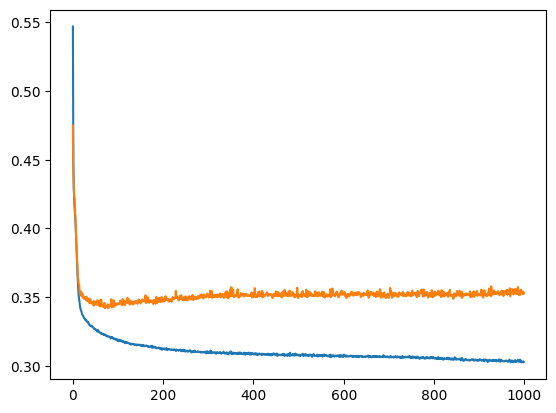

In [242]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

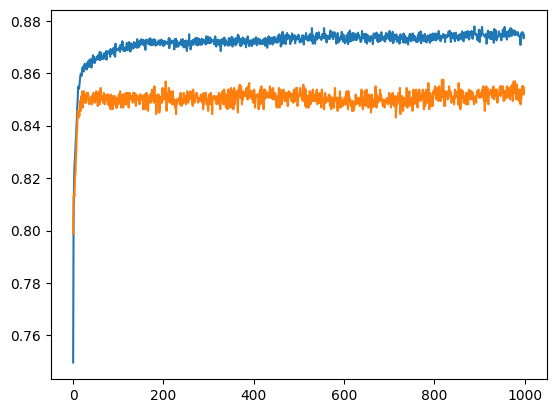

In [243]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])